In [2]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas_profiling
import copy
from sklearn.decomposition import PCA
import sklearn.metrics
from sklearn import manifold
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

## Dane, klasteryzacja k-means

In [3]:
df=pd.read_csv("online_shoppers_intention.csv")
df=df.dropna()
df=df.drop(["Revenue"], axis=1)

In [4]:
X=df.copy()
X=pd.get_dummies(X, columns=["Month","OperatingSystems", "Browser", "Region", "TrafficType", "VisitorType"] )
nums=["Administrative", "Administrative_Duration", 
      "Informational", "Informational_Duration", 
      "ProductRelated", "ProductRelated_Duration",
     "BounceRates", "ExitRates", "PageValues", "SpecialDay"] 
X[nums]=(X[nums]-X[nums].min())/(X[nums].max()-X[nums].min())
df_norm=X.copy()
X=df.copy()
X=pd.get_dummies(X, columns=["Month","OperatingSystems", "Browser", "Region", "TrafficType", "VisitorType"] )
nums=["Administrative", "Administrative_Duration", 
      "Informational", "Informational_Duration", 
      "ProductRelated", "ProductRelated_Duration",
     "BounceRates", "ExitRates", "PageValues", "SpecialDay"] 
X[nums]=(X[nums]-X[nums].mean())/(X[nums].std())
df_scale=X.copy()

In [5]:
df_scale.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,-0.697553,-0.457458,-0.396615,-0.245029,-0.691473,-0.624767,3.672477,3.235240,-0.317363,-0.309001,...,0,0,0,0,0,0,0,0,0,1
1,-0.697553,-0.457458,-0.396615,-0.245029,-0.668997,-0.591336,-0.457439,1.174544,-0.317363,-0.309001,...,0,0,0,0,0,0,0,0,0,1
2,-0.697553,-0.463112,-0.396615,-0.252130,-0.691473,-0.625290,3.672477,3.235240,-0.317363,-0.309001,...,0,0,0,0,0,0,0,0,0,1
3,-0.697553,-0.457458,-0.396615,-0.245029,-0.668997,-0.623374,0.575040,1.998823,-0.317363,-0.309001,...,0,0,0,0,0,0,0,0,0,1
4,-0.697553,-0.457458,-0.396615,-0.245029,-0.489182,-0.296984,-0.044447,0.144196,-0.317363,-0.309001,...,0,0,0,0,0,0,0,0,0,1


Text(0, 0.5, 'Inertia')

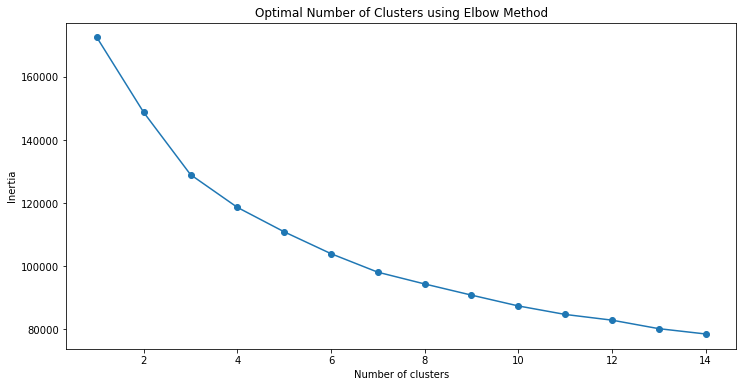

In [6]:
sse = []
k_list = range(1, 15)
for k in k_list:
    km = KMeans(n_clusters=k)
    km.fit(df_scale)
    sse.append([k, km.inertia_])
    
oca_results_scale = pd.DataFrame({'Cluster': range(1,15), 'SSE': sse})
plt.figure(figsize=(12,6))
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1], marker='o')
plt.title('Optimal Number of Clusters using Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [7]:
# A w praktyce wygląda to tak:
def count_clustering_scores(X, cluster_num, model, score_fun):
    # Napiszmy tę funkcje tak ogólnie, jak to możliwe. 
    # Zwróćcie uwagę na przekazanie obiektów typu callable: model i score_fun.
    if isinstance(cluster_num, int):
        cluster_num_iter = [cluster_num]
    else:
        cluster_num_iter = cluster_num
        
    scores = []    
    for k in cluster_num_iter:
        model_instance = model(n_clusters=k)
        labels = model_instance.fit_predict(X)
        wcss = score_fun(X, labels)
        scores.append(wcss)
    
    if isinstance(cluster_num, int):
        return scores[0]
    else:
        return scores

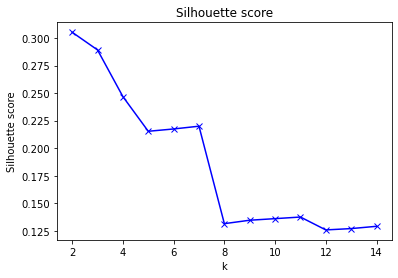

In [8]:
from sklearn.metrics import silhouette_score

cluster_num_seq = range(2, 15) # Niektóre metryki nie działają gdy mamy tylko jeden klaster
silhouette_vec = count_clustering_scores(df_scale, cluster_num_seq, KMeans, silhouette_score)
plt.plot(cluster_num_seq, silhouette_vec, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.title("Silhouette score")
plt.show()


## t-SNE - tylko do wizualizacji

In [9]:
# A w praktyce wygląda to tak:
def count_clustering_scores(X, cluster_num, model, score_fun):
    # Napiszmy tę funkcje tak ogólnie, jak to możliwe. 
    # Zwróćcie uwagę na przekazanie obiektów typu callable: model i score_fun.
    if isinstance(cluster_num, int):
        cluster_num_iter = [cluster_num]
    else:
        cluster_num_iter = cluster_num
        
    scores = []    
    for k in cluster_num_iter:
        model_instance = model(n_clusters=k)
        labels = model_instance.fit_predict(X)
        wcss = score_fun(X, labels)
        scores.append(wcss)
    
    if isinstance(cluster_num, int):
        return scores[0]
    else:
        return scores

C:\Users\Jan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

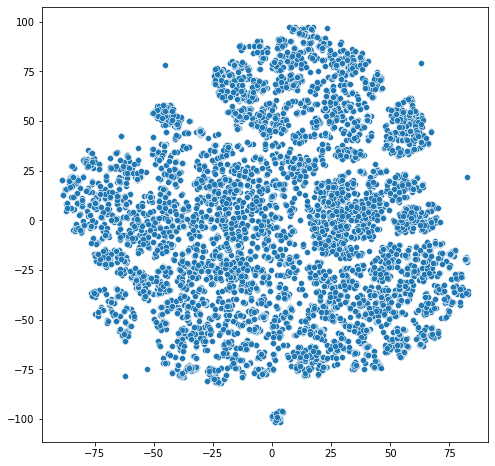

In [10]:
tsne = TSNE(n_components=2, perplexity=35, random_state=40)
cords=tsne.fit_transform(df_norm)
plt.figure(figsize=(8,8))
sns.scatterplot(cords[:, 0], cords[:, 1], marker = 'o')

C:\Users\Jan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

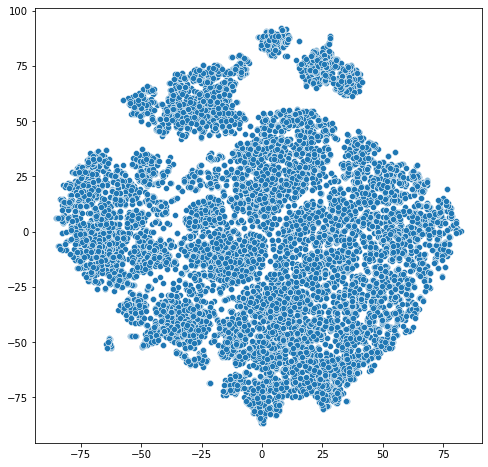

In [11]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=30, random_state=1)
coordsFIN=tsne.fit_transform(df_scale)
plt.figure(figsize=(8,8))
sns.scatterplot(coordsFIN[:, 0], coordsFIN[:, 1], marker = 'o')

## Klasteryzacja k means

In [12]:
def count_wcss_scores(X, k_max):
    #  WCSS = within-cluster sum of squares
    scores = []
    for k in range(1, k_max+1):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(X)
        wcss = kmeans.score(X) * -1 # score returns -WCSS
        scores.append(wcss)
    return scores

In [13]:
km=KMeans(n_clusters=7, random_state=40)
arr=km.fit_predict(df_scale)
lst=[]
for i in range(len(arr)):
    lst.append(str(arr[i]))

C:\Users\Jan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Clustering using all dimensions')

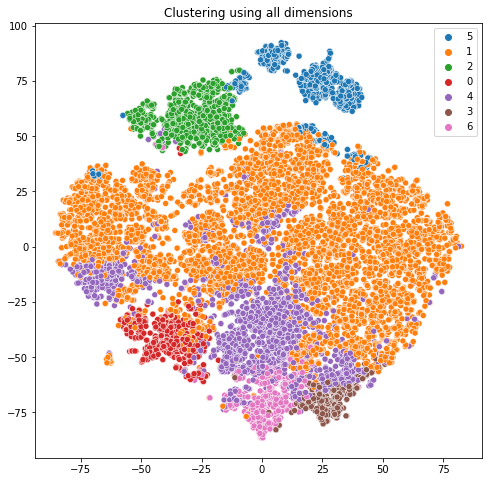

In [14]:
plt.figure(figsize=(8,8))
sns.scatterplot(coordsFIN[:, 0], coordsFIN[:, 1], marker = 'o', hue=lst).set_title("Clustering using all dimensions")

## PCA

Text(0.5, 1.0, 'PCA explained variance')

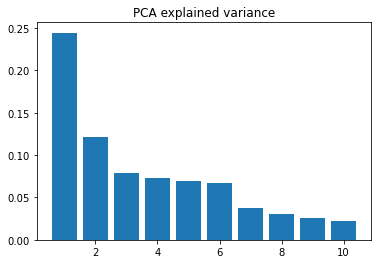

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pC = pca.fit_transform(df_scale)
ss=pca.explained_variance_ratio_
x=range(1,11)
plt.bar(x, ss)
plt.title("PCA explained variance")

C:\Users\Jan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'After 2d PCA')

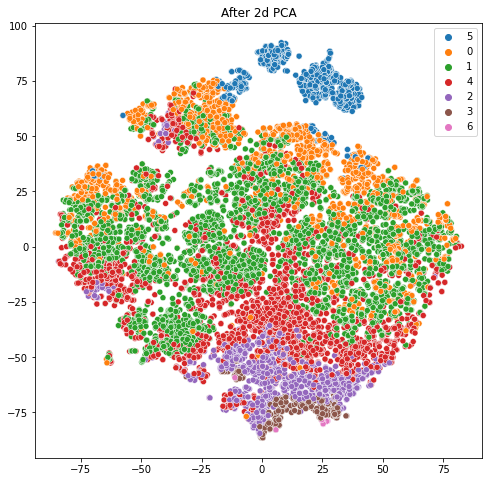

In [16]:
pca = PCA(n_components=2)
df_scale
pC = pca.fit_transform(df_scale)
km=KMeans(n_clusters=7, random_state=40)
arr=km.fit_predict(pC)
lst=[]
for i in range(len(arr)):
    lst.append(str(arr[i]))
plt.figure(figsize=(8,8))
sns.scatterplot(coordsFIN[:, 0], coordsFIN[:, 1], marker = 'o', hue=lst).set_title("After 2d PCA")

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
df_scale
pC = pca.fit_transform(df_scale)

In [18]:
km=KMeans(n_clusters=7, random_state=40)
arr=km.fit_predict(pC)
lstFin=[]
for i in range(len(arr)):
    lstFin.append(str(arr[i]))

C:\Users\Jan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'After 6d PCA')

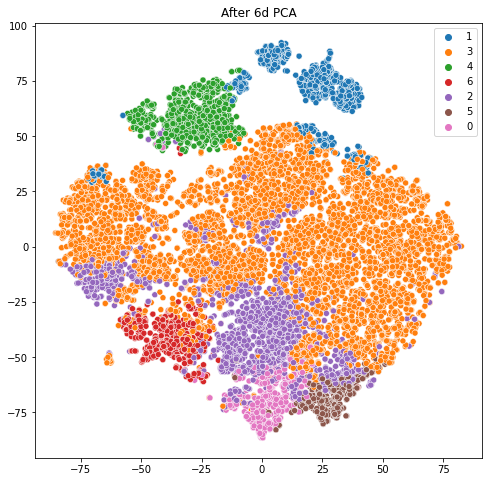

In [19]:
plt.figure(figsize=(8,8))
sns.scatterplot(coordsFIN[:, 0], coordsFIN[:, 1], marker = 'o', hue=lstFin).set_title("After 6d PCA")

In [20]:
from sklearn.metrics import adjusted_mutual_info_score

In [21]:
for i in range(len(df_scale.columns)):
    print(f"{df_scale.columns[i]}: {adjusted_mutual_info_score(df_scale.iloc[:, i], lst)}" ) 

Administrative: 0.1911714225049339
Administrative_Duration: 0.08357875479756202
Informational: 0.19900853839620336
Informational_Duration: 0.12721766229391115
ProductRelated: 0.1484832761208349
ProductRelated_Duration: 0.03375928952606079
BounceRates: 0.1960404109937648
ExitRates: 0.1529290770498833
PageValues: 0.03903308724655664
SpecialDay: 0.03465679149476827
Weekend: 0.0019077495844321503
Month_Aug: 0.0004328184754573891
Month_Dec: 0.0013201786813762458
Month_Feb: 0.0059965174586356935
Month_Jul: -0.00012434541256417118
Month_June: 0.0010721039645300598
Month_Mar: 0.0041028422054351235
Month_May: 0.013325994803690044
Month_Nov: 0.011694108974036
Month_Oct: 0.0038509103447635046
Month_Sep: 0.0025558640288833433
OperatingSystems_1: 0.0018967400388558299
OperatingSystems_2: 0.006192047742414939
OperatingSystems_3: 0.005226088316196516
OperatingSystems_4: 0.0009054251071059689
OperatingSystems_5: 5.11214612070386e-05
OperatingSystems_6: -0.0001176003394583869
OperatingSystems_7: -0.000

In [22]:
pca = PCA(n_components=2)
pC2 = pca.fit_transform(df_scale)
km=KMeans(n_clusters=7, random_state=40)
km_pC2_pred=km.fit_predict(pC2)
lst=[]
for i in range(len(km_pC2_pred)):
    lst.append(str(km_pC2_pred[i]))

In [23]:
pca = PCA(n_components=6)
pC6 = pca.fit_transform(df_scale)
km=KMeans(n_clusters=7, random_state=40)
km_pC6_pred=km.fit_predict(pC6)
lst=[]
for i in range(len(km_pC6_pred)):
    lst.append(str(km_pC6_pred[i]))

In [24]:
km=KMeans(n_clusters=7, random_state=40)
km_pred=km.fit_predict(df_scale)
lst=[]
for i in range(len(km_pred)):
    lst.append(str(km_pred[i]))

In [25]:
km=KMeans(n_clusters=7, random_state=50)
km_pred2=km.fit_predict(df_scale)
lst=[]
for i in range(len(km_pred)):
    lst.append(str(km_pred[i]))

In [26]:
adjusted_mutual_info_score(km_pred,km_pred2)

0.9872288327165795

## Informacja wzajemna klastrowań przed i po PCA
### PCA n_component = 6

In [27]:
adjusted_mutual_info_score(km_pred,km_pC6_pred)

0.9301404284248578

### PCA n_component = 2

In [28]:
adjusted_mutual_info_score(km_pred,km_pC2_pred)

0.44937202726312775

## Stabilność(?)
### PCA n_component = 6

In [29]:
pca = PCA(n_components=6)
pC6 = pca.fit_transform(df_scale)
mis = []
for i in range(20):
    km=KMeans(n_clusters=7)
    km_pC6_pred=km.fit_predict(pC6)
        
    km=KMeans(n_clusters=7)
    km_pred=km.fit_predict(df_scale)

    mis.append(adjusted_mutual_info_score(km_pred,km_pC6_pred))

print(f"Mean mutual info score of random non-PCA / PCA clusters: {np.mean(mis)}")
print(f"Std of random non-PCA / PCA clusters: {np.std(mis)}")

Mean mutual info score of random non-PCA / PCA clusters: 0.9276728645726207
Std of random non-PCA / PCA clusters: 0.011029566912655437


### PCA n_component = 2

In [30]:
pca = PCA(n_components=2)
pC6 = pca.fit_transform(df_scale)
mis = []
for i in range(20):
    km=KMeans(n_clusters=7)
    km_pC2_pred=km.fit_predict(pC2)
        
    km=KMeans(n_clusters=7)
    km_pred=km.fit_predict(df_scale)

    mis.append(adjusted_mutual_info_score(km_pred,km_pC2_pred))

print(f"Mean mutual info score of random non-PCA / PCA clusters: {np.mean(mis)}")
print(f"Std of random non-PCA / PCA clusters: {np.std(mis)}")

Mean mutual info score of random non-PCA / PCA clusters: 0.4473783793300722
Std of random non-PCA / PCA clusters: 0.0017477419495951722


## TSNE na PCA (tylko żeby spróbwać)


C:\Users\Jan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Jan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

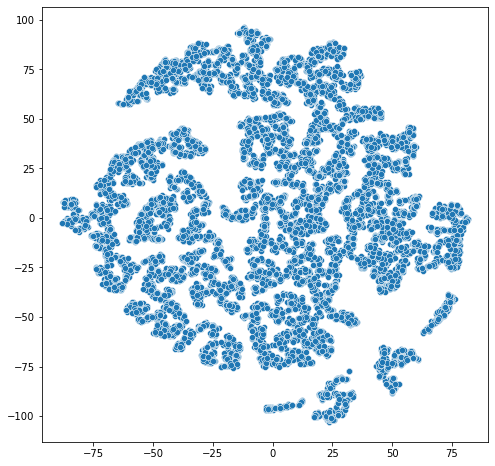

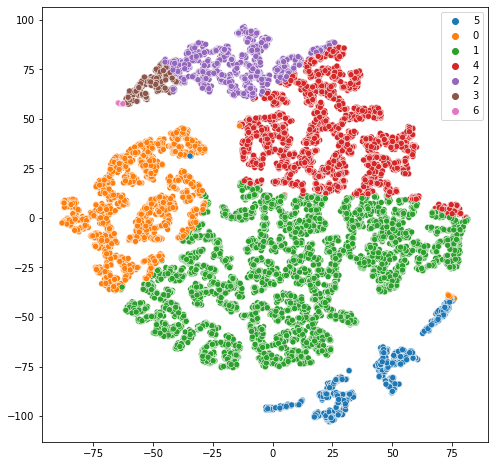

In [31]:
pca = PCA(n_components=2)
pC = pca.fit_transform(df_scale)
tsne = TSNE(n_components=2, perplexity=35, random_state=40)
coordsFIN=tsne.fit_transform(pC)
plt.figure(figsize=(8,8))
sns.scatterplot(coordsFIN[:, 0], coordsFIN[:, 1], marker = 'o')
km=KMeans(n_clusters=7, random_state=40)
arr=km.fit_predict(pC)
lst=[]
for i in range(len(arr)):
    lst.append(str(arr[i]))
plt.figure(figsize=(8,8))
sns.scatterplot(coordsFIN[:, 0], coordsFIN[:, 1], marker = 'o', hue=lst)

C:\Users\Jan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Jan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

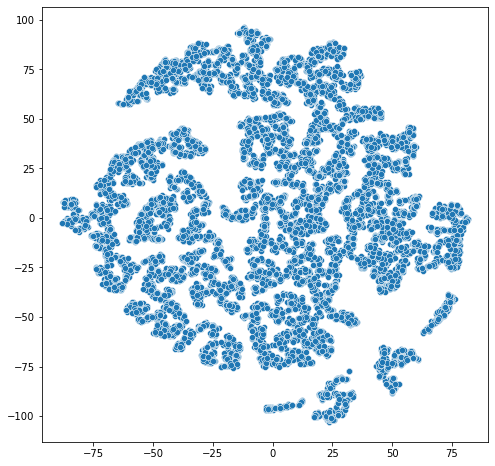

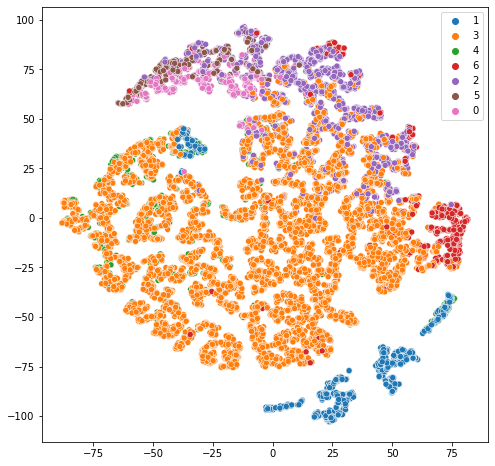

In [32]:
pca = PCA(n_components=6)
pC = pca.fit_transform(df_scale)
tsne = TSNE(n_components=2, perplexity=35, random_state=40)
#coordsFIN=tsne.fit_transform(pC)
plt.figure(figsize=(8,8))
sns.scatterplot(coordsFIN[:, 0], coordsFIN[:, 1], marker = 'o')
km=KMeans(n_clusters=7, random_state=40)
arr=km.fit_predict(pC)
lst=[]
for i in range(len(arr)):
    lst.append(str(arr[i]))
plt.figure(figsize=(8,8))
sns.scatterplot(coordsFIN[:, 0], coordsFIN[:, 1], marker = 'o', hue=lst)

## Charakterystyka klastrów

## Korelacje

## Informacja wzajemna - all

In [33]:
import sklearn.metrics as metrics
def mtr(x, y):
    return metrics.normalized_mutual_info_score(x, y)


In [34]:
df=pd.read_csv("online_shoppers_intention.csv")
df=df.dropna()
X=df.copy().drop(nums, axis=1)
cats=["Month", "OperatingSystems" ,"Browser" ,"Region" , "TrafficType","VisitorType","Weekend","Revenue"]
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for n in cats:
    X[n]=le.fit_transform(X[n])



In [35]:
X["Cluster"]=lst
cats.append("Cluster")
dst=metrics.pairwise_distances(X.T, metric=mtr)


[Text(0, 0.5, 'Month'),
 Text(0, 1.5, 'OperatingSystems'),
 Text(0, 2.5, 'Browser'),
 Text(0, 3.5, 'Region'),
 Text(0, 4.5, 'TrafficType'),
 Text(0, 5.5, 'VisitorType'),
 Text(0, 6.5, 'Weekend'),
 Text(0, 7.5, 'Revenue'),
 Text(0, 8.5, 'Cluster')]

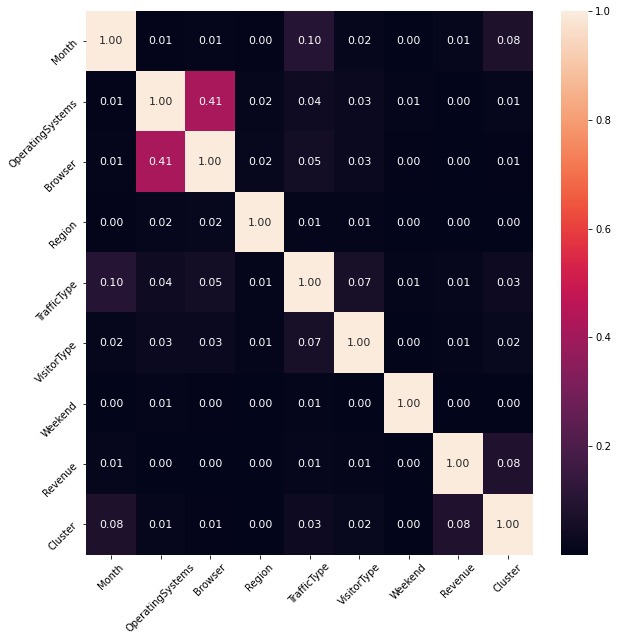

In [36]:
plt.figure(figsize=(10, 10))
p=sns.heatmap(dst, annot=True, annot_kws={'size': 11}, fmt='.2f')
p.set_xticklabels(cats, rotation=45)
p.set_yticklabels(cats, rotation=45)

## Informacja wzajemna - szczegółowo

<AxesSubplot:ylabel='cats'>

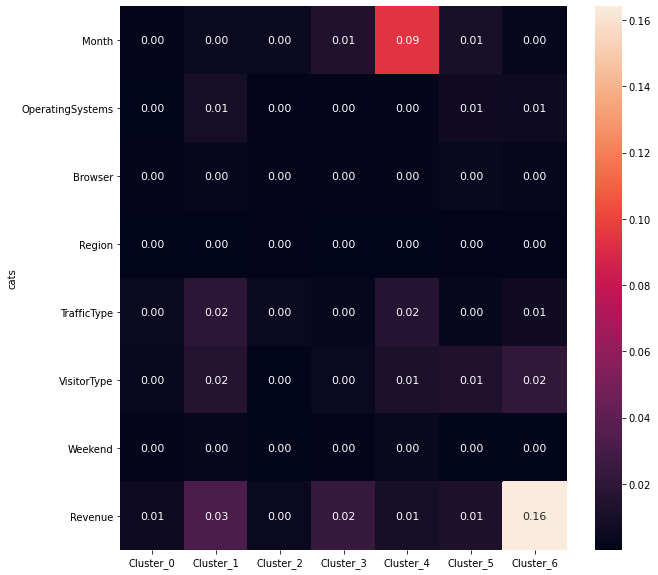

In [37]:
X=df.copy().drop(nums, axis=1)
X["Cluster"]=lst
cats=["Month", "OperatingSystems" ,"Browser" ,"Region" , "TrafficType","VisitorType","Weekend","Revenue"]
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for n in cats:
    X[n]=le.fit_transform(X[n])

    
X=pd.get_dummies(X, columns=["Cluster"] )
cls=["Cluster_0","Cluster_1", "Cluster_2", "Cluster_3", "Cluster_4", "Cluster_5", "Cluster_6" ]    


cats2=np.concatenate((cats, cls))
dst=pd.DataFrame(metrics.pairwise_distances(X.T, metric=mtr))
dst["cats"]=cats2
dst=dst.set_index("cats")
dst.columns=cats2
dst=dst[cls]
dst=dst.iloc[dst.index.isin(cats)]

plt.figure(figsize=(10, 10))
sns.heatmap(dst, annot=True, annot_kws={'size': 11}, fmt='.2f')

## Korelacja

<AxesSubplot:>

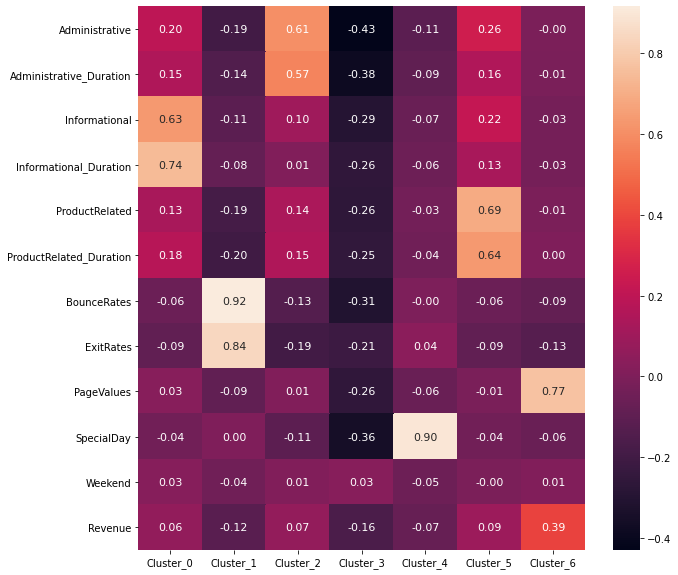

In [38]:
from scipy import stats
X=df.copy().dropna()
X["Cluster"]=lst
nums=["Administrative", "Administrative_Duration", 
      "Informational", "Informational_Duration", 
      "ProductRelated", "ProductRelated_Duration",
     "BounceRates", "ExitRates", "PageValues", "SpecialDay"] 
times=["Administrative_Duration", "Informational_Duration", "ProductRelated_Duration"]
X=pd.get_dummies(X, columns=["Cluster"] )
cls=["Cluster_0","Cluster_1", "Cluster_2", "Cluster_3", "Cluster_4", "Cluster_5", "Cluster_6" ]
X[times] = X[times][X<X.quantile(0.997)]
corr=X.corr()[cls]
nums.append("Revenue")
nums.append("Weekend")
X=X.replace(True, 1)
X=X.replace(False, 0)
corr=corr.iloc[corr.index.isin(nums)]
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, annot_kws={'size': 11}, fmt='.2f')

## charakterystyka klastrów

### Czas

Text(0.5, 1.0, '% of transactions by cluster')

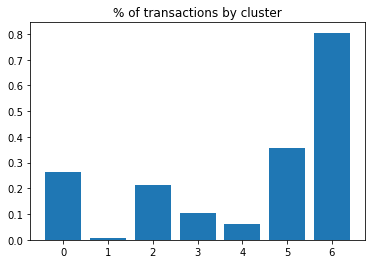

In [39]:
df=pd.read_csv("online_shoppers_intention.csv")
df_scale2=df.dropna().copy()
df_scale_lbs=df_scale2.copy()
df_scale_lbs["lbs"]=lst
tmp=pd.DataFrame()
tmp["lab"]=[]
tmp["score"]=[]
tmp=df_scale_lbs.groupby("lbs").agg({'Revenue':['sum', "count"]}).reset_index()
tmp.columns=["lbs", "sum", "count"]
tmp["prc"]=tmp["sum"]/tmp["count"]
plt.bar(tmp["lbs"], tmp["prc"])
plt.title("% of transactions by cluster")
    


### Months

In [40]:
X=df.dropna().copy()
X["lbs"]=lst
X
X=X[["Month", "lbs"]]
X=X.groupby(["Month", "lbs"]).agg({'Month':["count"]}).reset_index()
X
X.columns=["Month", "lbs", "count"]
X=X.pivot(columns="Month", index="lbs", values="count")
X=X.fillna(0)

X=X.T
for i in X.columns:
    X[i] = X[i]/X[i].sum()
X=X.T
#X.columns=["1",  "2", "3", "4", "5", "6", "7", "8"]
X=X.reset_index().drop(["lbs"], axis=1)
X

Month,Aug,Dec,Feb,Jul,June,Mar,May,Nov,Oct,Sep
0,0.042596,0.154158,0.000000,0.036511,0.012170,0.148073,0.210953,0.310345,0.048682,0.036511
1,0.024044,0.131148,0.042623,0.039344,0.040437,0.178142,0.311475,0.209836,0.013115,0.009836
2,0.048116,0.139130,0.001739,0.032464,0.022029,0.132174,0.221449,0.272464,0.077101,0.053333
3,0.036619,0.158045,0.012115,0.040158,0.025320,0.185543,0.211271,0.246937,0.044650,0.039341
4,0.000000,0.000000,0.054604,0.000000,0.000000,0.000000,0.945396,0.000000,0.000000,0.000000
5,0.034384,0.091691,0.002865,0.040115,0.045845,0.028653,0.083095,0.581662,0.045845,0.045845
6,0.046931,0.176895,0.001805,0.023466,0.009025,0.102888,0.231047,0.299639,0.064982,0.043321


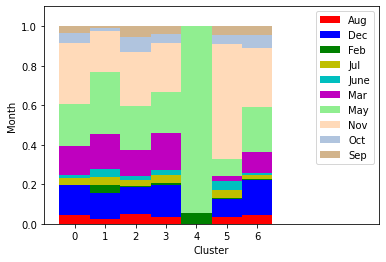

In [41]:
fig, ax = plt.subplots()
bot=[0]*7
labs=["0", "1", "2", "3", "4", "5", "6"]
colors=["r", "b", "g", "y", "c", "m", "lightgreen", "peachpuff", "lightsteelblue", "tan", "violet" ]
width=1
for i in range(len(X.columns)):
    ax.bar(labs, X[X.columns[i]],  width, bottom=bot, color=colors[i], label=X.columns[i])
    bot+=X[X.columns[i]]

ax.legend()
ax.set_ylabel('Month')
ax.set_xlabel('Cluster')
ax.set_ylim([0, 1.1])
ax.set_xlim([-1, 10])
plt.show()






## Czas

Text(0.5, 1.0, 'avg. total time by cluster')

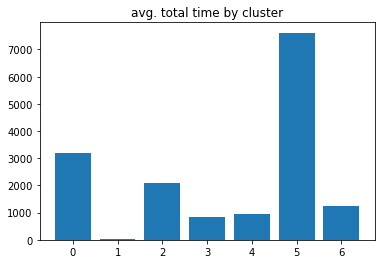

In [42]:
from scipy import stats




df_scale_lbs=df_scale.dropna().copy()
 # without outliers
df_scale_lbs["Time"]=df["ProductRelated_Duration"]+df["Administrative_Duration"]+df["Informational_Duration"]
x = df_scale_lbs["Time"]
ind=(x<x.quantile(.997)).to_numpy()
lst_outliers=np.array(lst)


lst_outliers=lst_outliers[ind]

df_scale_lbs = df_scale_lbs[ind]



df_scale_lbs["lbs"]=lst_outliers
df_scale_lbs[df_scale_lbs["Time"]<0]=0
df_scale_lbs["Time"]=pd.to_numeric(df_scale_lbs["Time"])
tmp=df_scale_lbs.groupby("lbs").agg({'Time':['sum', "count"]}).reset_index()
tmp.columns=["lbs", "sum", "count"]
tmp["prc"]=tmp["sum"]/tmp["count"]
tmp["lbs"]=pd.to_numeric(tmp["lbs"])
plt.bar(tmp["lbs"], tmp["prc"])
plt.title("avg. total time by cluster")